In [15]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Add in Stocks for analysis

In [16]:
start = '2015-11-1'
end = '2019-11-1'

In [17]:
nyse = ['COF', 'RY', 'BAC', 'CIT', 'C','JPM','WFC','USB','XLF','^NYA']
nyse_pf = pd.DataFrame()
for t in nyse:
    nyse_pf[t] = wb.DataReader(t, data_source='yahoo', start=start, end=end )['Adj Close']   


In [18]:
nyse_pf

,COF,RY,BAC,CIT,C,JPM,WFC,USB,XLF,^NYA
Date,,,,,,,,,,
2015-11-02,73.117867,47.992222,15.917968,39.740135,50.010738,58.668331,47.942196,38.450550,14.131503,10579.870117
2015-11-03,73.719437,48.952904,16.029936,38.452255,50.317318,58.883167,48.012115,38.549862,14.154658,10609.919922
2015-11-04,73.418663,48.649529,15.871314,38.949009,50.010738,58.945831,48.034115,38.477634,14.114133,10563.959961
2015-11-05,72.869041,48.961334,16.151232,39.123787,50.308029,59.473976,48.280533,38.486668,14.172027,10548.360352
2015-11-06,74.581985,48.548405,16.748386,39.813728,51.905994,61.282158,49.151798,39.470718,14.316757,10513.360352
...,...,...,...,...,...,...,...,...,...,...
2019-10-28,94.780357,81.169998,31.840000,44.071648,73.067719,126.510002,51.160381,57.020000,28.790001,13186.429688
2019-10-29,94.073265,80.910004,32.070000,44.498276,72.571266,126.430000,51.675449,57.340000,28.860001,13209.629883
2019-10-30,94.142975,80.949997,31.620001,43.863293,72.452126,125.730003,51.536777,57.119999,28.840000,13244.009766


In [19]:
returns = np.log( nyse_pf / nyse_pf.shift(1) )

In [20]:
cov = returns.cov() * 250
cov

,COF,RY,BAC,CIT,C,JPM,WFC,USB,XLF,^NYA
COF,0.060595,0.019827,0.048804,0.041224,0.045897,0.039374,0.035741,0.032088,0.035046,0.021299
RY,0.019827,0.024902,0.022785,0.019562,0.024162,0.019467,0.017269,0.015938,0.016888,0.013982
BAC,0.048804,0.022785,0.067604,0.046381,0.057467,0.048939,0.042908,0.038271,0.040825,0.023219
CIT,0.041224,0.019562,0.046381,0.064854,0.045336,0.035992,0.033412,0.030819,0.032526,0.020852
C,0.045897,0.024162,0.057467,0.045336,0.063670,0.046586,0.040549,0.035542,0.038997,0.023982
JPM,0.039374,0.019467,0.048939,0.035992,0.046586,0.043789,0.034784,0.031535,0.033731,0.019741
WFC,0.035741,0.017269,0.042908,0.033412,0.040549,0.034784,0.045820,0.029610,0.031689,0.017728
USB,0.032088,0.015938,0.038271,0.030819,0.035542,0.031535,0.029610,0.031966,0.027376,0.016439
XLF,0.035046,0.016888,0.040825,0.032526,0.038997,0.033731,0.031689,0.027376,0.047455,0.018541
^NYA,0.021299,0.013982,0.023219,0.020852,0.023982,0.019741,0.017728,0.016439,0.018541,0.015277


In [21]:
corr_matrix = returns.corr()
corr_matrix

,COF,RY,BAC,CIT,C,JPM,WFC,USB,XLF,^NYA
COF,1.000000,0.510420,0.762512,0.657607,0.738917,0.764380,0.678308,0.729075,0.653545,0.700033
RY,0.510420,1.000000,0.555315,0.486770,0.606814,0.589524,0.511241,0.564917,0.491264,0.716840
BAC,0.762512,0.555315,1.000000,0.700466,0.875923,0.899478,0.770955,0.823265,0.720776,0.722497
CIT,0.657607,0.486770,0.700466,1.000000,0.705518,0.675400,0.612936,0.676871,0.586315,0.662463
C,0.738917,0.606814,0.875923,0.705518,1.000000,0.882286,0.750731,0.787819,0.709445,0.768965
JPM,0.764380,0.589524,0.899478,0.675400,0.882286,1.000000,0.776544,0.842874,0.739963,0.763274
WFC,0.678308,0.511241,0.770955,0.612936,0.750731,0.776544,1.000000,0.773705,0.679592,0.670063
USB,0.729075,0.564917,0.823265,0.676871,0.787819,0.842874,0.773705,1.000000,0.702890,0.743909
XLF,0.653545,0.491264,0.720776,0.586315,0.709445,0.739963,0.679592,0.702890,1.000000,0.688609
^NYA,0.700033,0.716840,0.722497,0.662463,0.768965,0.763274,0.670063,0.743909,0.688609,1.000000


In [22]:
cov_with_market = cov.iloc[-1]
cov_with_market

COF     0.021299
RY      0.013982
BAC     0.023219
CIT     0.020852
C       0.023982
JPM     0.019741
WFC     0.017728
USB     0.016439
XLF     0.018541
^NYA    0.015277
Name: ^NYA, dtype: float64

In [23]:
cov.loc['^NYA']

COF     0.021299
RY      0.013982
BAC     0.023219
CIT     0.020852
C       0.023982
JPM     0.019741
WFC     0.017728
USB     0.016439
XLF     0.018541
^NYA    0.015277
Name: ^NYA, dtype: float64

In [25]:
market_var = returns['^NYA'].var() * 250
market_var

0.015276829412456424

# Betas

In [26]:
betas = cov_with_market / market_var
betas

COF     1.394188
RY      0.915213
BAC     1.519861
CIT     1.364937
C       1.569852
JPM     1.292247
WFC     1.160445
USB     1.076088
XLF     1.213654
^NYA    1.000000
Name: ^NYA, dtype: float64

In [27]:
rf= 0.03
MRP = 0.05

In [28]:
E_r = rf+ betas * MRP
E_r

COF     0.099709
RY      0.075761
BAC     0.105993
CIT     0.098247
C       0.108493
JPM     0.094612
WFC     0.088022
USB     0.083804
XLF     0.090683
^NYA    0.080000
Name: ^NYA, dtype: float64

In [46]:
Sharpe = (E_r - rf) / (returns.std() * 250 ** 0.5)
Sharpe

COF     0.283186
RY      0.289985
BAC     0.292273
CIT     0.267988
C       0.311071
JPM     0.308769
WFC     0.271062
USB     0.300935
XLF     0.278565
^NYA    0.404532
dtype: float64

In [47]:
universe = ['XLF','JPM','COF','RY','C' ,'^NYA']

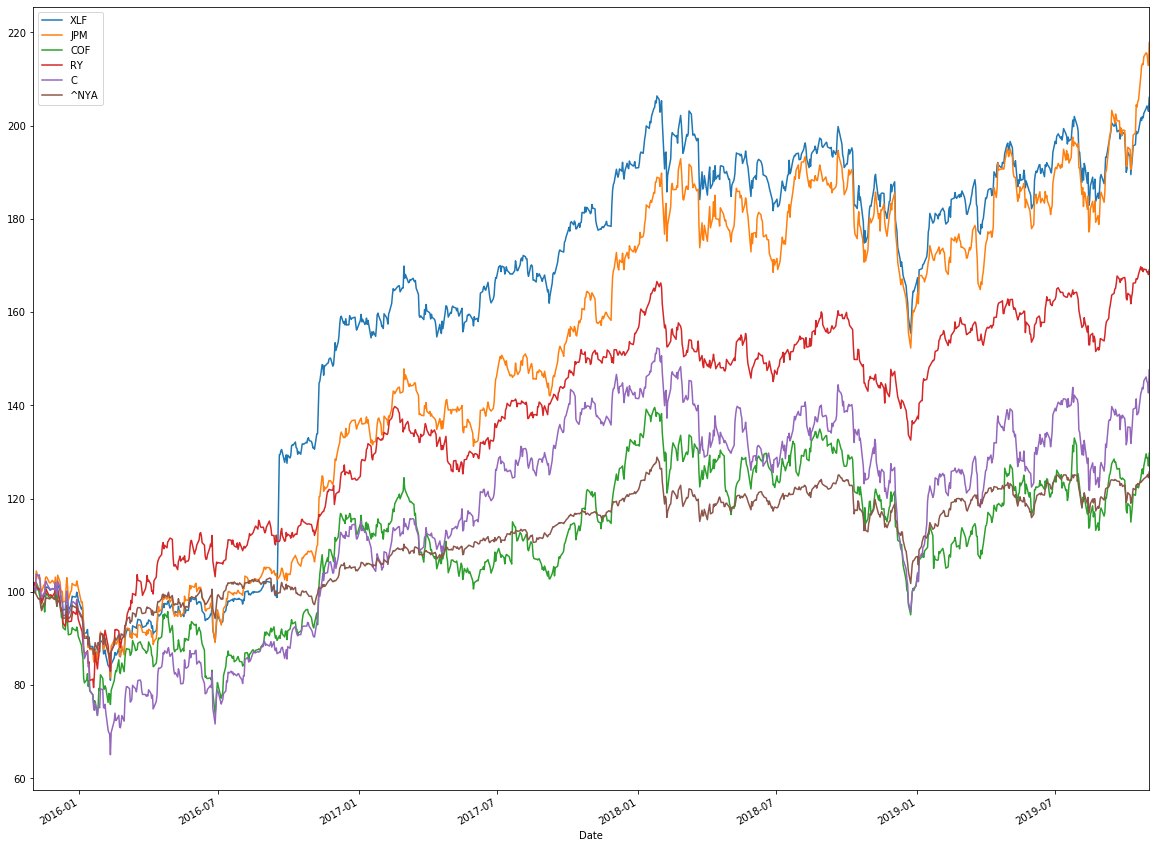

In [48]:
(nyse_pf[universe]/ nyse_pf[universe].iloc[0] * 100).plot(figsize = (20, 16));
plt.show()

# Calculate Expected Return of Stocks

In [56]:
tickers1 = ['COF', 'RY', 'BAC', 'CIT', 'C','JPM','WFC','USB','^NYA']

data = pd.DataFrame()
for t in tickers1:
    data[t] = wb.DataReader(t, data_source='yahoo', start=start, end=end)['Adj Close']  
    
sec_returns = np.log( data / data.shift(1) )
cov = sec_returns.cov() * 250
cov_with_market = cov.iloc[-1]
market_var = sec_returns['^NYA'].var() * 250

beta = cov_with_market / market_var
rf= 0.03
MRP = 0.05
E_r = rf+ beta * MRP

In [57]:
cov 

,COF,RY,BAC,CIT,C,JPM,WFC,USB,^NYA
COF,0.060595,0.019827,0.048804,0.041224,0.045897,0.039374,0.035741,0.032088,0.021299
RY,0.019827,0.024902,0.022785,0.019562,0.024162,0.019467,0.017269,0.015938,0.013982
BAC,0.048804,0.022785,0.067604,0.046381,0.057467,0.048939,0.042908,0.038271,0.023219
CIT,0.041224,0.019562,0.046381,0.064854,0.045336,0.035992,0.033412,0.030819,0.020852
C,0.045897,0.024162,0.057467,0.045336,0.063670,0.046586,0.040549,0.035542,0.023982
JPM,0.039374,0.019467,0.048939,0.035992,0.046586,0.043789,0.034784,0.031535,0.019741
WFC,0.035741,0.017269,0.042908,0.033412,0.040549,0.034784,0.045820,0.029610,0.017728
USB,0.032088,0.015938,0.038271,0.030819,0.035542,0.031535,0.029610,0.031966,0.016439
^NYA,0.021299,0.013982,0.023219,0.020852,0.023982,0.019741,0.017728,0.016439,0.015277


In [58]:
cov_with_market

COF     0.021299
RY      0.013982
BAC     0.023219
CIT     0.020852
C       0.023982
JPM     0.019741
WFC     0.017728
USB     0.016439
^NYA    0.015277
Name: ^NYA, dtype: float64

In [59]:
market_var

0.015276829412456424

In [60]:
beta

COF     1.394188
RY      0.915213
BAC     1.519861
CIT     1.364937
C       1.569852
JPM     1.292247
WFC     1.160445
USB     1.076088
^NYA    1.000000
Name: ^NYA, dtype: float64

In [61]:
E_r

COF     0.099709
RY      0.075761
BAC     0.105993
CIT     0.098247
C       0.108493
JPM     0.094612
WFC     0.088022
USB     0.083804
^NYA    0.080000
Name: ^NYA, dtype: float64

# Estimate Sharpe Ratio

In [62]:
Sharpe = (E_r - rf) / (sec_returns.std() * 250 ** 0.5)
Sharpe

COF     0.283186
RY      0.289985
BAC     0.292273
CIT     0.267988
C       0.311071
JPM     0.308769
WFC     0.271062
USB     0.300935
^NYA    0.404532
dtype: float64

# Calculate Portfolio of all Securities
## Compare an equal weighted portfolio of Banks to Bank ETF


In [81]:
weights = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125])

In [82]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2015-11-02 to 2019-11-01
Data columns (total 10 columns):
COF     1007 non-null float64
RY      1007 non-null float64
BAC     1007 non-null float64
CIT     1007 non-null float64
C       1007 non-null float64
JPM     1007 non-null float64
WFC     1007 non-null float64
USB     1007 non-null float64
XLF     1007 non-null float64
^NYA    1007 non-null float64
dtypes: float64(10)
memory usage: 86.6 KB


In [83]:
returns.head()

,COF,RY,BAC,CIT,C,JPM,WFC,USB,XLF,^NYA
Date,,,,,,,,,,
2015-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-03,0.008194,0.019820,0.007009,-0.032944,0.006112,0.003655,0.001457,0.002580,0.001637,0.002836
2015-11-04,-0.004088,-0.006217,-0.009945,0.012836,-0.006112,0.001064,0.000458,-0.001875,-0.002867,-0.004341
2015-11-05,-0.007514,0.006389,0.017483,0.004477,0.005927,0.008920,0.005117,0.000235,0.004093,-0.001478
2015-11-06,0.023235,-0.008470,0.036306,0.017481,0.031270,0.029950,0.017885,0.025247,0.010161,-0.003324


In [84]:
return_tbl= returns.drop(['^NYA','XLF'], axis=1)

In [85]:
return_tbl.head()

,COF,RY,BAC,CIT,C,JPM,WFC,USB
Date,,,,,,,,
2015-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-03,0.008194,0.019820,0.007009,-0.032944,0.006112,0.003655,0.001457,0.002580
2015-11-04,-0.004088,-0.006217,-0.009945,0.012836,-0.006112,0.001064,0.000458,-0.001875
2015-11-05,-0.007514,0.006389,0.017483,0.004477,0.005927,0.008920,0.005117,0.000235
2015-11-06,0.023235,-0.008470,0.036306,0.017481,0.031270,0.029950,0.017885,0.025247


In [86]:
annual_returns = return_tbl.mean() * 250
annual_returns

COF    0.064630
RY     0.130402
BAC    0.171802
CIT    0.018195
C      0.096739
JPM    0.193289
WFC    0.018664
USB    0.100249
dtype: float64

In [87]:
PF_Return = np.dot(annual_returns, weights)
PF_Return

0.09924609028499273

In [90]:
pfolio_var = np.dot(weights.T, np.dot(return_tbl.cov() * 250, weights))
pfolio_var

0.03693343602627627

In [92]:
pfolio_vol = (np.dot(weights.T, np.dot(return_tbl.cov() * 250, weights))) ** 0.5
pfolio_vol

0.19218073791687937

In [93]:
Sharpe_PF= (PF_Return - rf) / pfolio_vol
Sharpe_PF

0.36031753772817

In [97]:
print (str(round(Sharpe_PF, 5) * 100))

36.032
